# Arbol de decision para especies de flores

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
urldata = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/iris/iris.csv" 

In [52]:
data = pd.read_csv(urldata)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

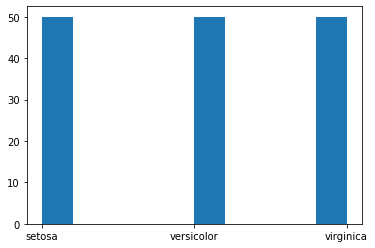

In [54]:
plt.hist(data.Species)

In [55]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [56]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [57]:
import numpy as np

In [58]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

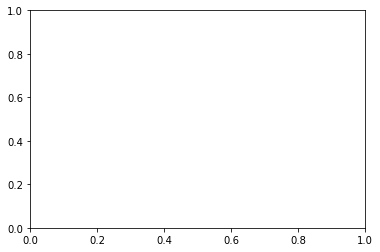

In [59]:
plt.hist(data.is_train)

In [ ]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [62]:
preds = tree.predict(test[predictors])

In [63]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,14,0
virginica,0,2,12


## Visualizacion del arbol de decision

In [64]:
from sklearn.tree import export_graphviz

In [65]:
with open("/resources/iris_dtree.dot", "w") as %dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

SyntaxError: invalid syntax (<ipython-input-65-60113f2d0b2b>, line 1)

In [66]:
import os
from graphviz import Source

In [67]:
file =  open("/resources/iris_dtree.dot", "r")
text = file.read()
text

FileNotFoundError: [Errno 2] No such file or directory: '/resources/iris_dtree.dot'

In [68]:
Source(text)

NameError: name 'text' is not defined

## Cross Validation para la poda

In [69]:
X = data[predictors]
Y = data[target]

In [70]:
tree = tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [73]:
from sklearn.model_selection import KFold

In [91]:
cv = KFold(n_splits=X.shape[0], shuffle=True, random_state=1)

In [92]:
from sklearn.model_selection import cross_val_score

In [96]:
scores = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1))
scores

0.9466666666666667

In [98]:
for i in range(1,11):
    tree = tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=X.shape[0], shuffle=True, random_state=1)
    scores = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1))
    score = np.mean(scores)
    print(" Score para i= ",i," es de ",score)
    print("   ",tree.feature_importances_)

 Score para i=  1  es de  0.3333333333333333
    [0. 0. 1. 0.]
 Score para i=  2  es de  0.9533333333333334
    [0.         0.         0.66620285 0.33379715]
 Score para i=  3  es de  0.9533333333333334
    [0.         0.         0.68976981 0.31023019]
 Score para i=  4  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
 Score para i=  5  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
 Score para i=  6  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
 Score para i=  7  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
 Score para i=  8  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
 Score para i=  9  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
 Score para i=  10  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]


In [99]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']